In [170]:
import cairo
import numpy as np
from noise import snoise2, snoise4
from matplotlib import pyplot as plt
from PIL import Image
from enum import Enum
from scipy import ndimage
import math

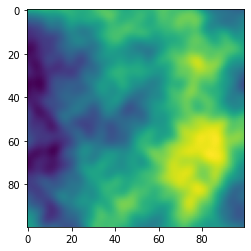

In [171]:
'''generate an array filled with smooth noise and display it'''
_MAXX_ = 100
_MAXY_ = 100
arrayShape = (_MAXX_,_MAXY_)
smoothNoise = np.zeros(arrayShape)

for y in range(_MAXY_):
    for x in range(_MAXX_):
        smoothNoise[x, y] = (snoise2(x / 100.0, y / 100.0, 4) + 1.0) / 2.0

plt.imshow(smoothNoise)

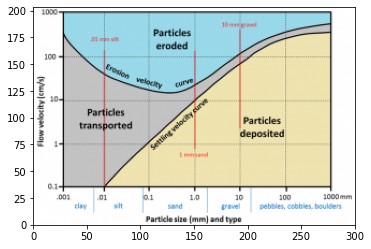

In [172]:
'''
https://opentextbc.ca/geology/chapter/13-3-stream-erosion-and-deposition/

Particle size of the sediment and the slope of the terrain effect the rate of deposition and erosion.
This had led me to assume this formula:
Δelevation = g(slope * ∑a fa( grainSizea))
The change in elevation is a function of the product of slope and a sum of all the functions of each grainsize.
'''
img = np.asarray(Image.open('./Reference/hulstrom.png'))
imgShape = img.shape
ex = (0, imgShape[1], 0, imgShape[0])
plt.imshow(img, extent=ex, aspect='equal')

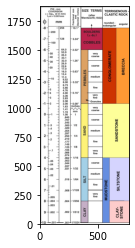

In [173]:
'''
The grain size of the sediment defines whether the terrain is silt, clay, pebbles, boulders...

https://geologyistheway.com/sedimentary/grain-size/
'''
img = np.asarray(Image.open('./Reference/sedimentSize.jpg'))
imgShape = img.shape
ex = (0, imgShape[1], 0, imgShape[0])
plt.imshow(img, extent=ex, aspect='equal')

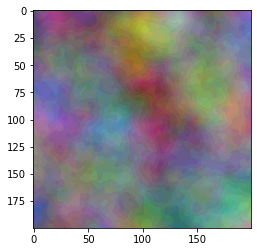

In [174]:
'''
Easy to quickly model with three sizes, then to display RGB as those three sediment sizes...
'''
_MAXX_ = 200
_MAXY_ = 200

class GrainData():
    ##millimeters
    particleSize = 1.0
    
    def __init__ (self, particleSize):
        self.particleSize = particleSize
    

SedimentGrain = Enum('SedimentGrain', ['Clay', 'Silt', 'Sand', 'Gravel', 'Pebbles'])

SedimentData = {
    SedimentGrain.Clay : GrainData(0.01),
    SedimentGrain.Sand : GrainData(1.0),
    SedimentGrain.Pebbles : GrainData(100.0)    
}

arrayShape = (_MAXX_,_MAXY_, 3)
sediment = np.zeros(arrayShape)

def getSediment(x, y, z = 0, grain = SedimentGrain.Clay):
    ##sediment placement is a smooth noise function
    no = ((snoise4(x / 100.0, y / 100.0, 100 * grain.value, z / 100, 4) + 1.0) / 2.0)
    
    ## add some stepping
    amountOfStepping = 20.0
    no = np.floor(no * amountOfStepping) / amountOfStepping 
    
    return no
        
for y in range(arrayShape[1]):
    for x in range(arrayShape[0]):
        sediment[x, y, 0] = getSediment(x, y, 0, SedimentGrain.Clay)
        sediment[x, y, 1] = getSediment(x, y, 0, SedimentGrain.Sand)
        sediment[x, y, 2] = getSediment(x, y, 0, SedimentGrain.Pebbles)
        
plt.imshow(sediment)

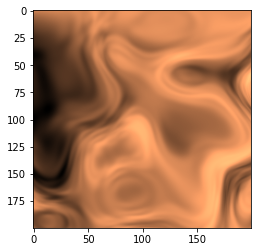

In [175]:
'''Now we need some terrain to start'''
arrayShape = (_MAXX_,_MAXY_)
heightMap = np.zeros(arrayShape)

for y in range(arrayShape[1]):
    for x in range(arrayShape[0]):
        offsetx = snoise2(x / 100, y / 100 + 1000) * 100.0
        offsety = snoise2(x / 100, y / 100 + 1000) * 100.0
        heightMap[x, y] = ((snoise2(x / (200.0 + offsetx), y / (200.0 + offsety), 4) + 1.0) / 2.0) ** 0.5

plt.imshow(heightMap, cmap='copper')

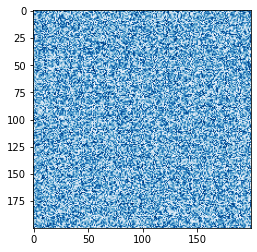

In [176]:
'''The terrain will need some water to start'''
waterMap = np.zeros(arrayShape)
'''
for y in range(arrayShape[1]):
    for x in range(arrayShape[0]):
        waterMap[x, y] = (snoise2(x / 1.0, y / 1.0, 16) + 1.0) / 2.0
'''
waterMap = np.random.rand(_MAXX_, _MAXY_)
plt.imshow(waterMap, cmap='Blues')

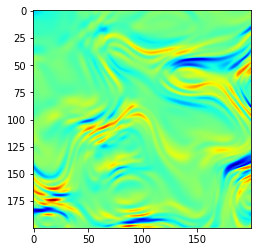

In [177]:
'''quick way to calc delta y on the height map
'''
plt.imshow(ndimage.sobel(heightMap, axis = 0), cmap='jet')

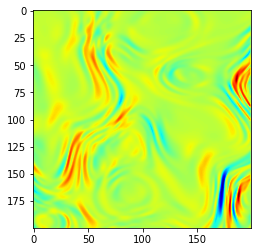

In [178]:
'''quick way to calc delta x on the height map
'''
plt.imshow(ndimage.sobel(heightMap, axis = 1), cmap='jet')

In [179]:
'''angle of slope map
'''
a = (ndimage.sobel(heightMap, axis = 0))
b = (ndimage.sobel(heightMap, axis = 1))

c = np.zeros((_MAXX_, _MAXY_))

for y in range(_MAXY_):
    for x in range(_MAXX_):
        c[x, y] = (np.arctan2(a, b)[x,y] / (2.0 * math.pi) )

c = (c + 1.0) / 2.0


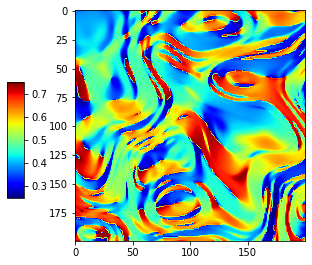

'\nAngle (orientation to north) of Slope Map (0 pi - 2 pi)\n'

In [180]:
plt.subplot()
plt.imshow(c, cmap='jet')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes((0.04, 0.25, 0.04, 0.4))
plt.colorbar(cax=cax, cmap='jet')

plt.show()
'''
Angle (orientation to north) of Slope Map (0 pi - 2 pi)
'''

In [181]:
math.pi

3.141592653589793

In [182]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo